In [1]:
#오존량 예측

import pandas as pd

df = pd.read_csv('c:/data/Data/ozone/ozone2.csv')

df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,67,0
1,118.000000,8.0,72,72,0
2,149.000000,12.6,74,74,0
3,313.000000,11.5,62,62,0
4,185.931507,14.3,56,56,0


In [2]:
#오존량 분류를 기준으로 한 평균값들
df.groupby('Result').mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,180.467566,11.082353,71.367647,71.367647
1,190.302659,9.057647,83.094118,83.094118


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

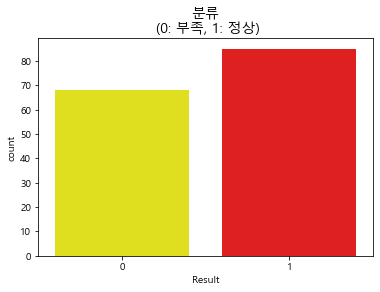

In [3]:
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

#한글처리
font_name = font_manager.FontProperties(
    fname='c:/Windows/Fonts/malgun.ttf'
).get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [4]:
df.columns[:-2]

Index(['Solar.R', 'Wind', 'Temp'], dtype='object')

In [5]:
df.columns[:]

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [6]:
train_cols = df.columns[:-2]
X = df[train_cols]
y = df['Result']

In [7]:
#오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [8]:
df_samp['Result'].value_counts()

0    85
1    85
Name: Result, dtype: int64

In [9]:
X = X_samp[train_cols]
y = y_samp['Result']

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


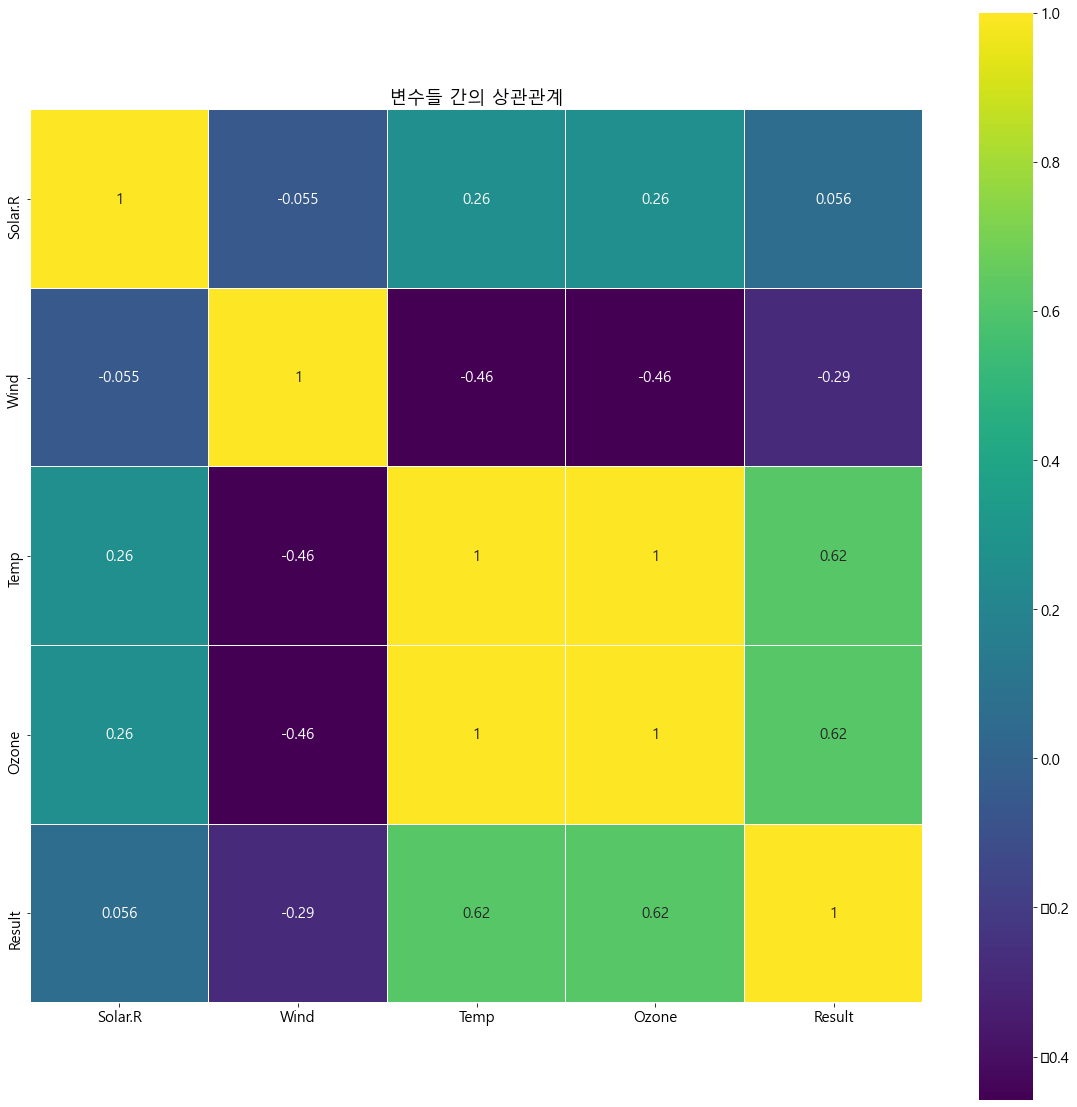

In [10]:
#상관계수 행렬 그래프
plt.figure(figsize=(20,20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True, annot=True,
cmap=plt.cm.viridis, linecolor='white')

plt.title('변수들 간의 상관관계')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

#아무래도 샘플수가 맞지 않아서 에러가 나는 것 같은데
# 처음에는 pdf대로 변수 선언을 했는데 에러가 나와서
# 두번 째 할 때는 선생님 것을 보고 변수를 [:-2]로 지정했습니다
#그래도 같은 에러가 출력됩니다.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=7)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#모델 구성
model = Sequential()
#노드 개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train_scaled = X_train
X_test_scaled = X_test

In [15]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
5/5 [==============================] - 1s 3ms/step - loss: 0.2406 - accuracy: 0.5368
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.7721
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1961 - accuracy: 0.8309
Epoch 4/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.8309
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1644 - accuracy: 0.8382
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.8456
Epoch 7/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.8529
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.8676
Epoch 9/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.8603
Epoch 10/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.8676
Epoch 11/1000
5/5 [

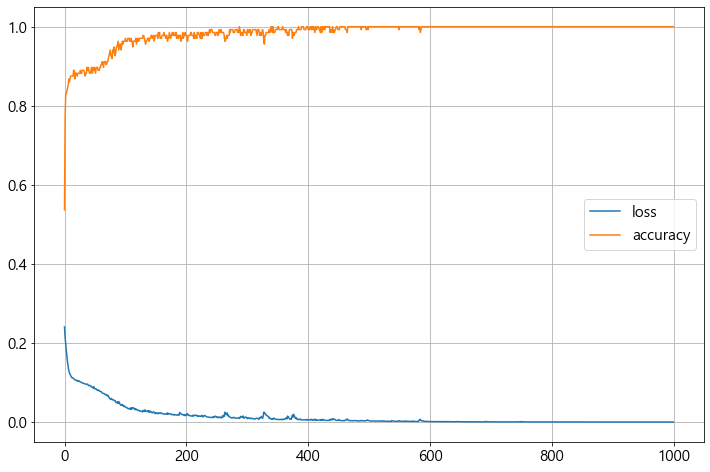

In [16]:
#모델 학습 과정 표시
plt.figure(figsize=(12, 8))
plt.plot(hist.history['loss']) #학습용 데이터의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [19]:
#모델 평가
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100)) #학습용
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100)) #검증용

5/5 [==============================] - 0s 5ms/step - loss: 6.9756e-05 - accuracy: 1.0000
[6.975559517741203e-05, 1.0]
accuracy: 100.00%
2/2 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.7941
[0.20104694366455078, 0.7941176295280457]
accuracy: 79.41%


In [22]:
import numpy as np

#새로운 값
# 일조량 25, 풍량 10.8, 화씨온도 71도일 때 오존량
test_set = np.array([25, 10.8, 71]).reshape(1,3)
print(model.predict(test_set)) #1일 확률 0%

test_set = np.array([255, 4.3, 90]).reshape(1,3)
print(model.predict(test_set))

[[1.]]
[[1.]]


In [23]:
#모델 저장
model.save('c:/data/Data/ozone/ozone_keras.model')
model.save_weights('c:/data/Data/ozone/ozone.weight')

INFO:tensorflow:Assets written to: c:/data/Data/ozone/ozone_keras.model\assets
